In [199]:
# 1번
help(chickwts)

chickwts               package:datasets                R Documentation

_C_h_i_c_k_e_n _W_e_i_g_h_t_s _b_y _F_e_e_d _T_y_p_e

_D_e_s_c_r_i_p_t_i_o_n:

     An experiment was conducted to measure and compare the
     effectiveness of various feed supplements on the growth rate of
     chickens.

_U_s_a_g_e:

     chickwts
     
_F_o_r_m_a_t:

     A data frame with 71 observations on the following 2 variables.

     ‘weight’ a numeric variable giving the chick weight.

     ‘feed’ a factor giving the feed type.

_D_e_t_a_i_l_s:

     Newly hatched chicks were randomly allocated into six groups, and
     each group was given a different feed supplement.  Their weights
     in grams after six weeks are given along with feed types.

_S_o_u_r_c_e:

     Anonymous (1948) _Biometrika_, *35*, 214.

_R_e_f_e_r_e_n_c_e_s:

     McNeil, D. R. (1977) _Interactive Data Analysis_.  New York:
     Wiley.

_E_x_a_m_p_l_e_s:



In [200]:
# 2번
str(chickwts)

'data.frame':	71 obs. of  2 variables:
 $ weight: num  179 160 136 227 217 168 108 124 143 140 ...
 $ feed  : Factor w/ 6 levels "casein","horsebean",..: 2 2 2 2 2 2 2 2 2 2 ...


In [201]:
# 3번
summary(chickwts)

     weight             feed   
 Min.   :108.0   casein   :12  
 1st Qu.:204.5   horsebean:10  
 Median :258.0   linseed  :12  
 Mean   :261.3   meatmeal :11  
 3rd Qu.:323.5   soybean  :14  
 Max.   :423.0   sunflower:12  

In [202]:
# 4번
tbl <- table(chickwts$feed)
tbl


   casein horsebean   linseed  meatmeal   soybean sunflower 
       12        10        12        11        14        12 

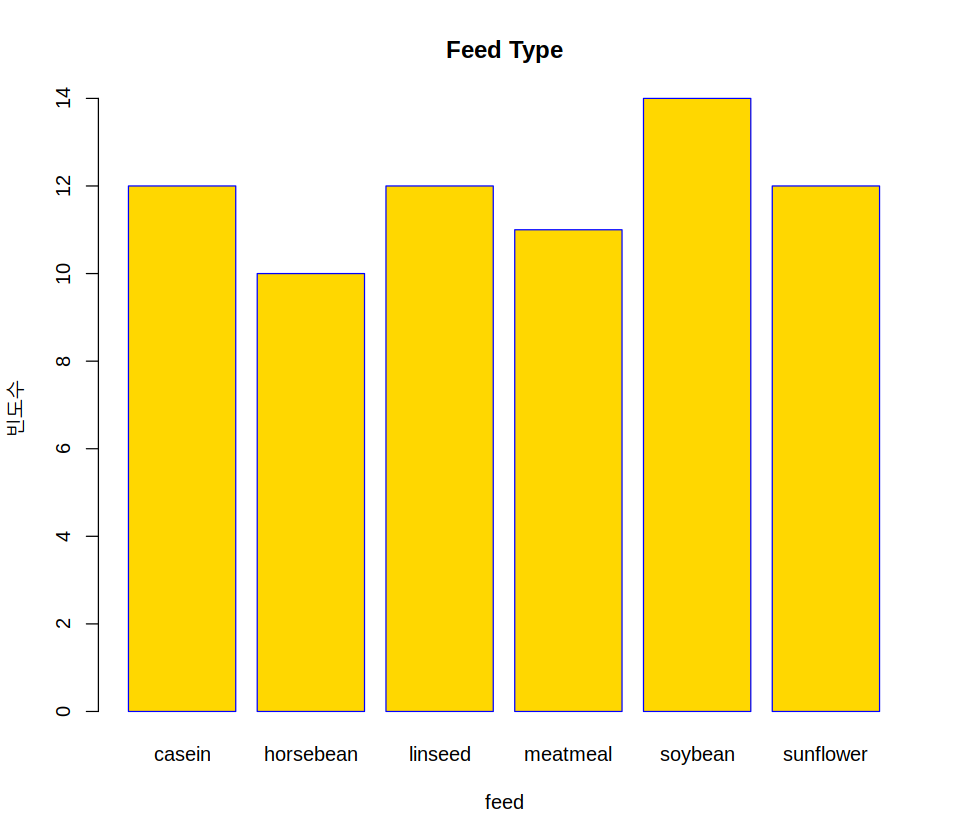

In [203]:
# 5번
barplot(tbl, 
        main = "Feed Type", 
        xlab = "feed", 
        ylab = "빈도수", 
        col = "gold", 
        border = "blue")


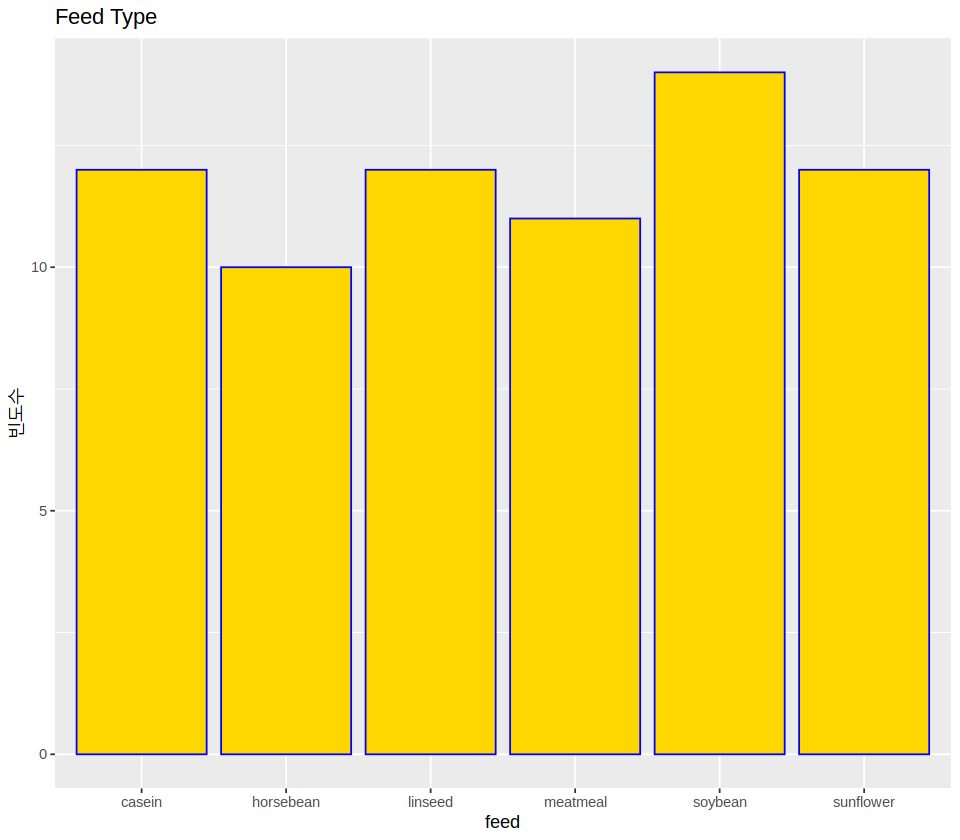

In [204]:
# 6번
library(ggplot2)
ggplot(chickwts, aes(x = feed)) +
  geom_bar(fill = "gold", color = "blue") +
  labs(title = "Feed Type", x = "feed", y = "빈도수")

In [205]:
# 7번
result <- tapply(chickwts$weight, chickwts$feed, mean)
print(result)

   casein horsebean   linseed  meatmeal   soybean sunflower 
 323.5833  160.2000  218.7500  276.9091  246.4286  328.9167 


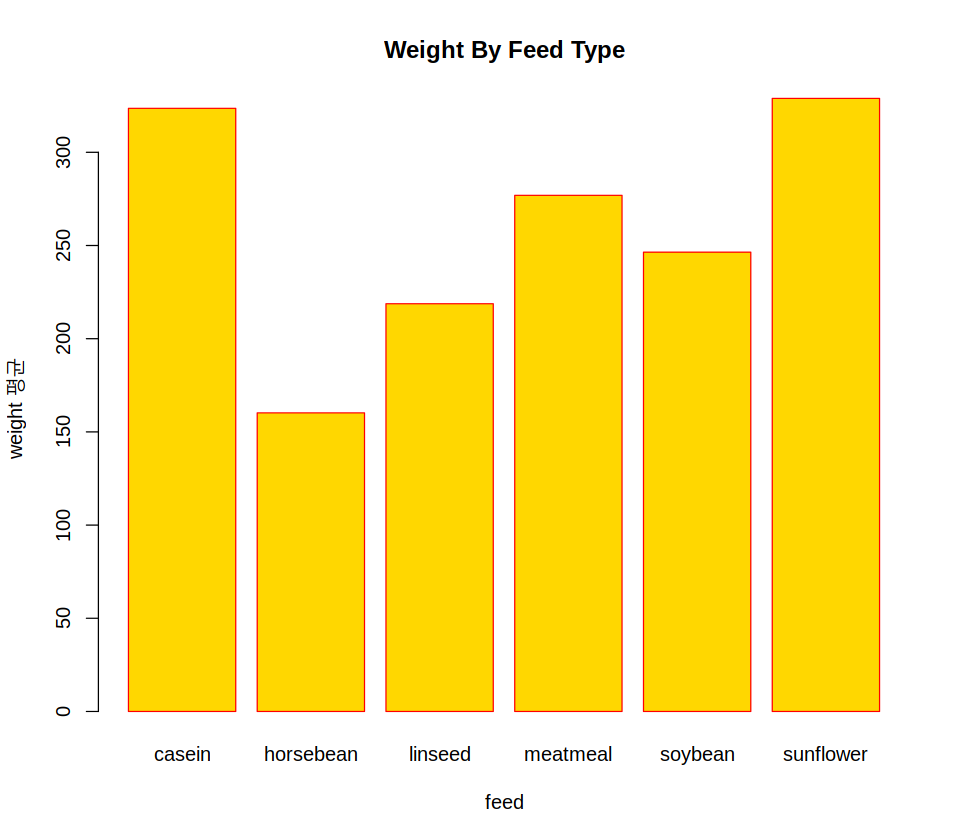

In [206]:
# 8번
barplot(result, 
        main = "Weight By Feed Type", 
        xlab = "feed", 
        ylab = "weight 평균", 
        col = "gold", 
        border = "red")

,feed,weight.mean
,<fct>,<dbl>
1,casein,323.5833
2,horsebean,160.2000
3,linseed,218.7500
4,meatmeal,276.9091
5,soybean,246.4286
6,sunflower,328.9167


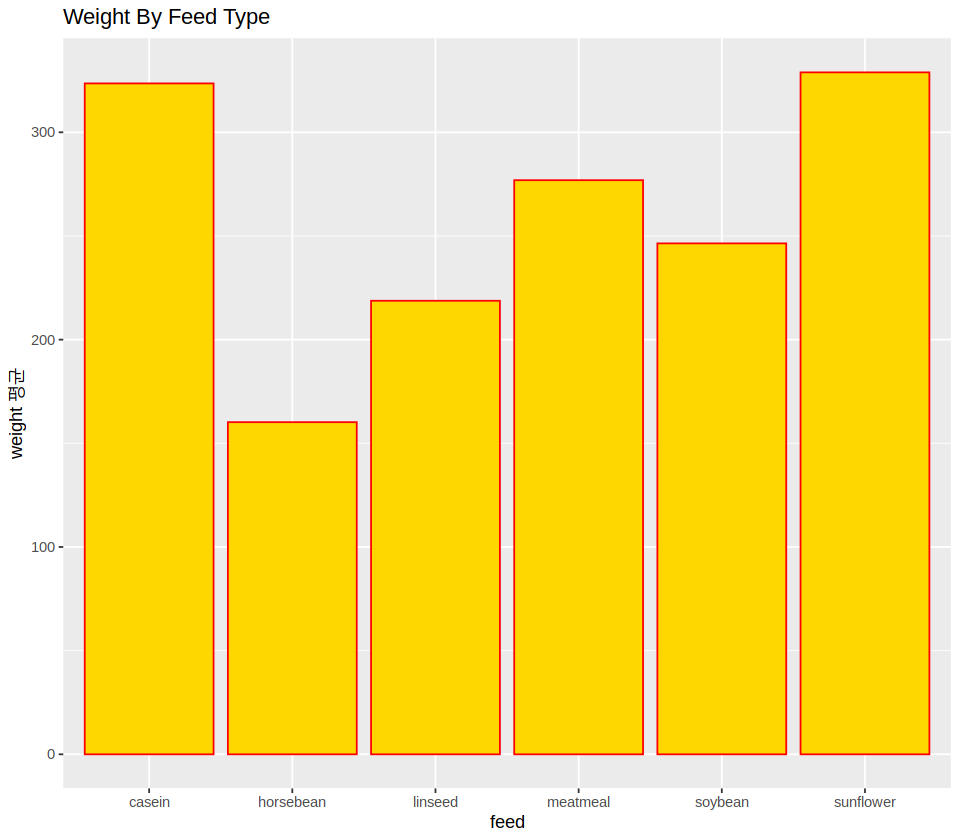

In [207]:
# 9번
library(doBy)
summary_data <- summaryBy(weight ~ feed, data = chickwts, FUN = mean)
summary_data
ggplot(summary_data, aes(x = feed, y = weight.mean)) +
  geom_bar(stat = "identity", fill = "gold", color = "red") +
  labs(title = "Weight By Feed Type", x = "feed", y = "weight 평균")

In [208]:
# 10번
bins <- seq(100, 450, by = 50)
hist_result <- cut(chickwts$weight, breaks = bins, right = FALSE)
table(hist_result)

hist_result
[100,150) [150,200) [200,250) [250,300) [300,350) [350,400) [400,450) 
        7        10        15        13        17         7         2 

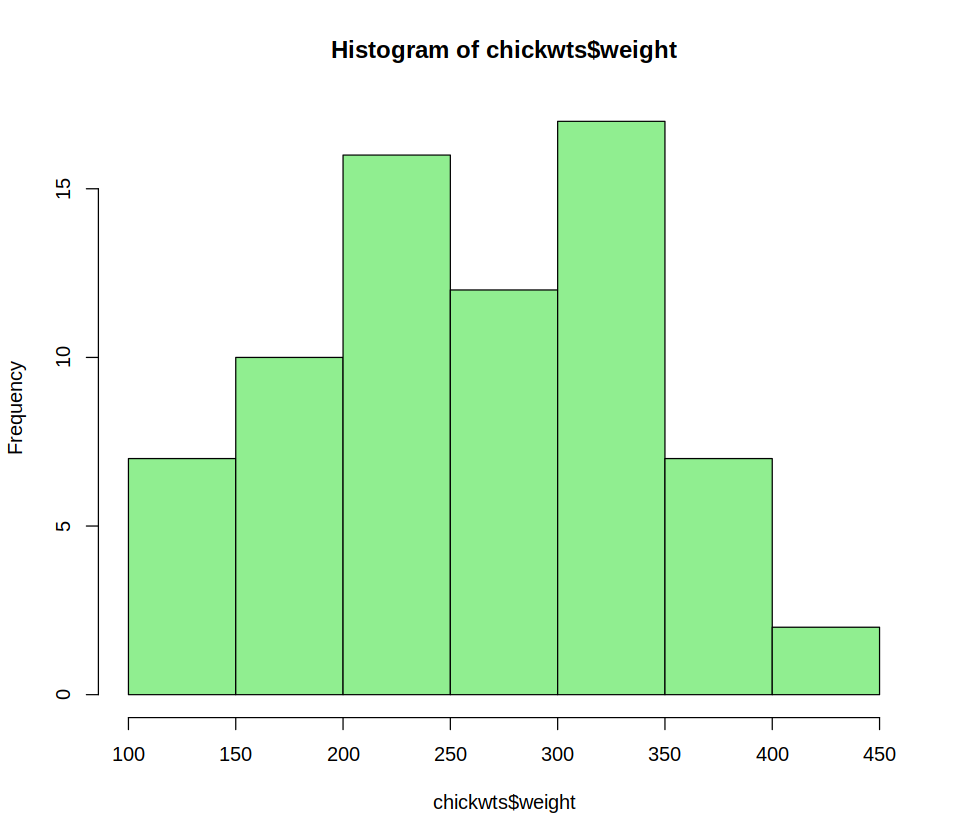

In [209]:
# 11번

# 히스토그램 생성
hist(chickwts$weight,
     breaks = seq(100, 450, by = 50),
     col = "lightgreen",
     border = "black",
     main = "Histogram of chickwts$weight",
     xlab = "chickwts$weight",
     ylab = "Frequency")



In [210]:
table(cut(chickwts$weight, breaks = seq(100, 450, by = 50)))


(100,150] (150,200] (200,250] (250,300] (300,350] (350,400] (400,450] 
        7        10        16        12        17         7         2 

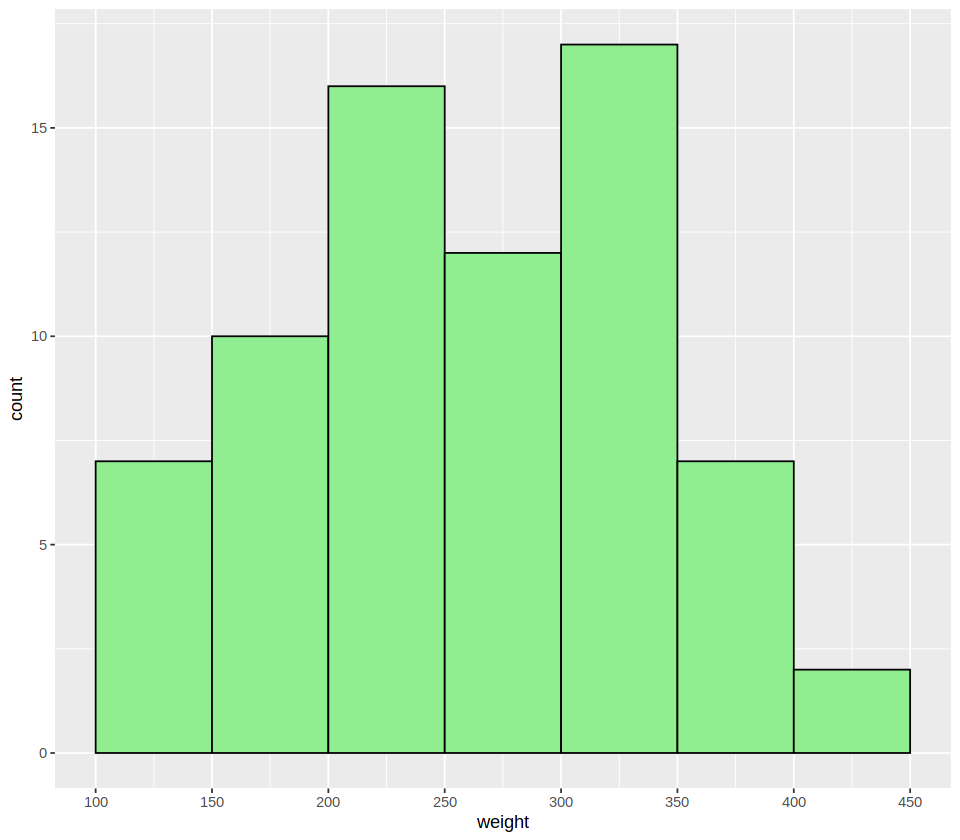

In [211]:
# 12번
library(ggplot2)

ggplot(chickwts, aes(x = weight)) +
  geom_histogram(breaks = seq(100, 450, by = 50), 
                 fill = "lightgreen", 
                 color = "black") +
  scale_x_continuous(breaks = seq(100, 450, by = 50)) + 
  labs(
       x = "weight", 
       y = "count")


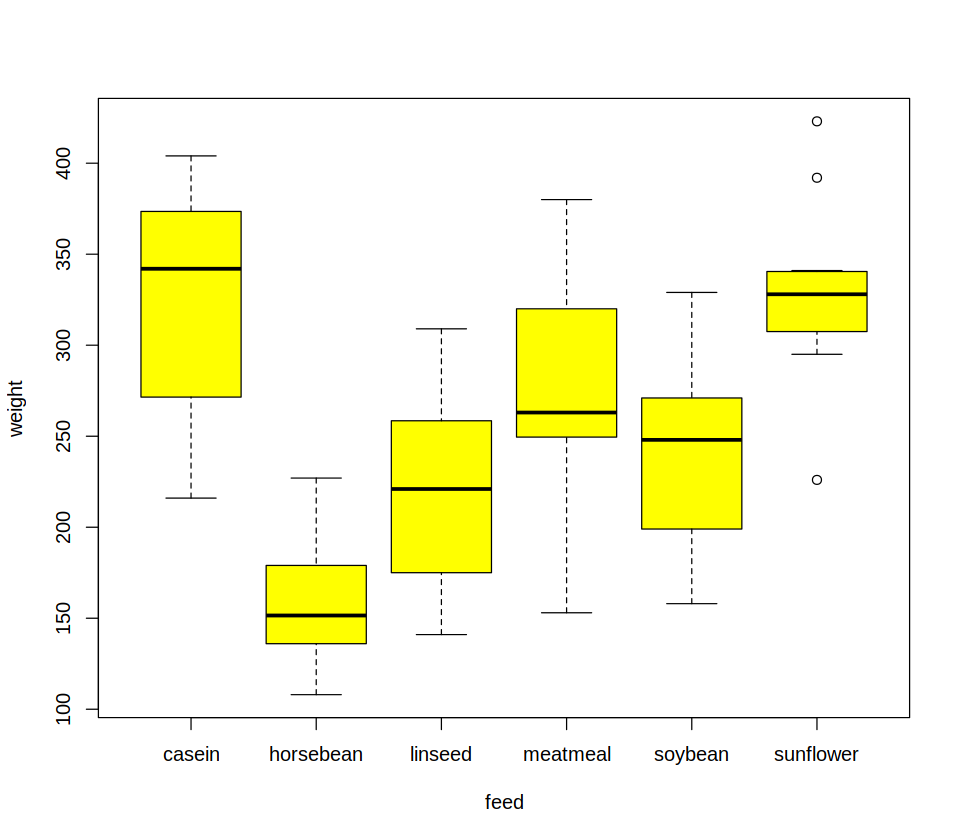

In [212]:
# 13번
boxplot(weight ~ feed, 
        data = chickwts, 
        col = "yellow", 
        xlab = "feed", 
        ylab = "weight")

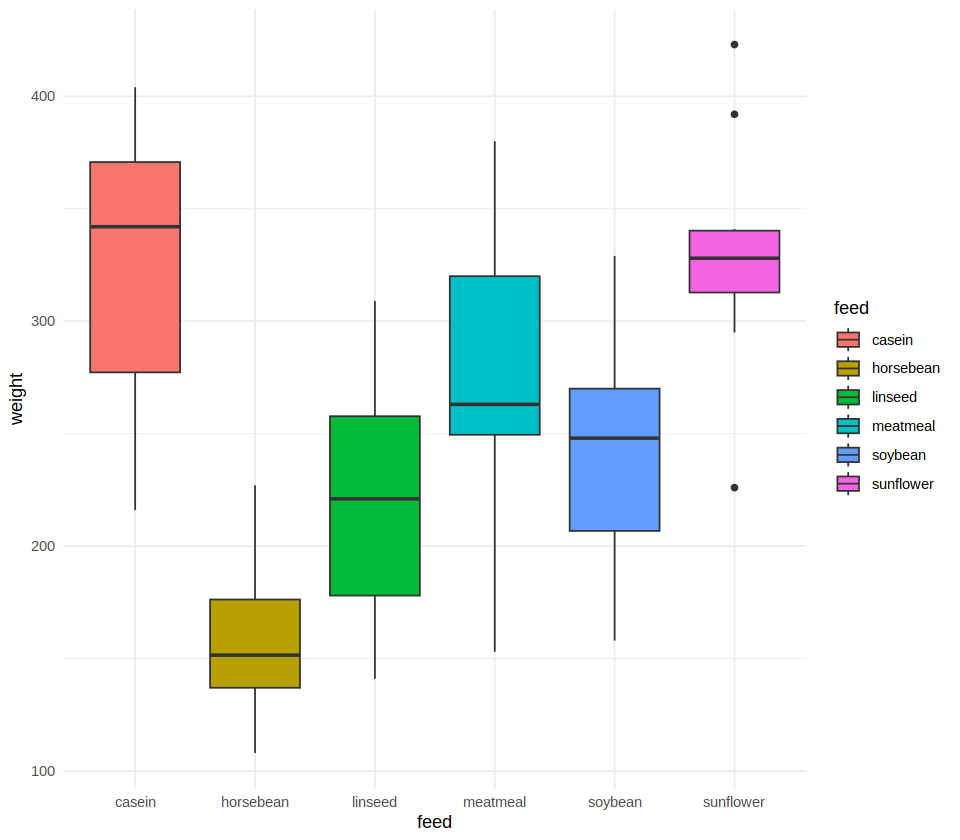

In [213]:
# 14번
ggplot(chickwts, aes(x = feed, y = weight, fill = feed)) +
  geom_boxplot() +
  labs(
       x = "feed",
       y = "weight") +
  theme_minimal()


In [214]:
# 15번
data <- read.csv("경기도 화성시_관광통계_20231025.csv", fileEncoding = "CP949")
head(data)

,번호,월,공룡알화석산지,국화도,우리꽃식물원,융건릉,향토박물관
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>
1,1,22-Jul,2906,4464,3927,20663,1672
2,2,22-Aug,3338,4427,4207,25409,161
3,3,22-Sep,7008,5421,7276,46993,1740
4,4,22-Oct,7554,4829,16492,60469,470
5,5,22-Nov,5433,2412,8652,39904,2597
6,6,22-Dec,3101,958,3449,12395,729


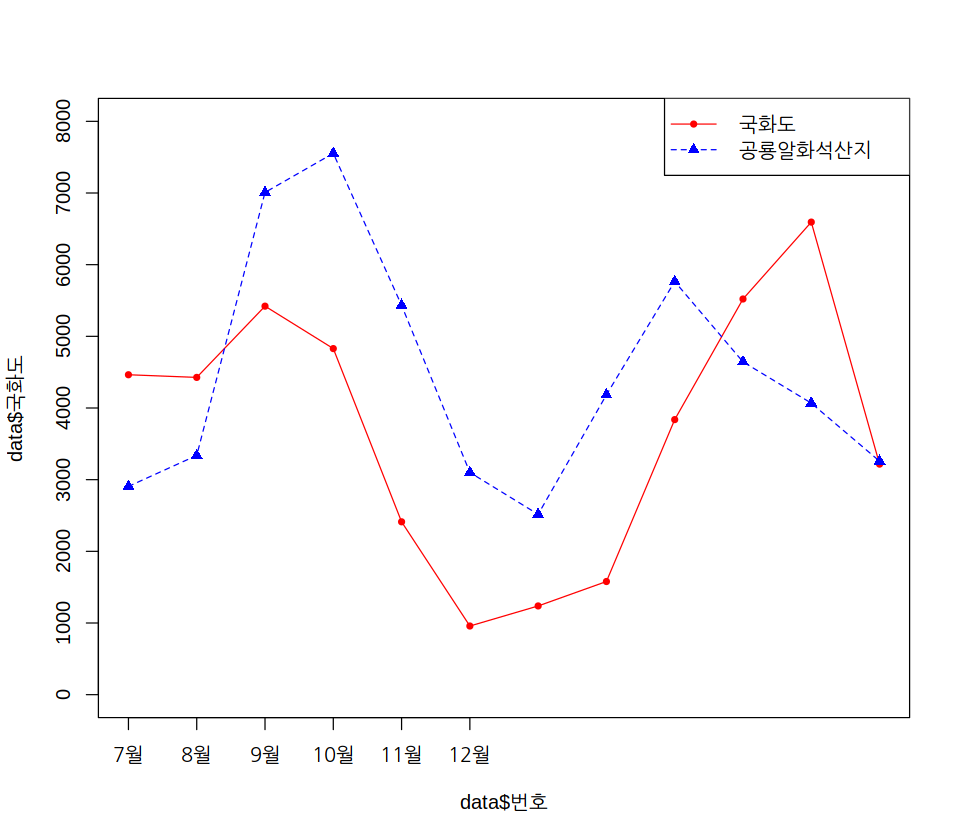

In [215]:
# 16번
options(repr.plot.width=8)

plot(data$번호, data$국화도, type = 'o', pch = 20, lty = 1, col = 'red', axes = FALSE, ylim = c(0, 8000))
axis(1, at = 1:6, labels = c('7월', '8월', '9월', '10월', '11월', '12월'))
axis(2, at = seq(0, 8000, by = 1000))
box()
points(data$번호, data$공룡알화석산지, type = 'o', pch = 17, lty = 2, col = 'blue')
legend("topright", legend = c("국화도", "공룡알화석산지"), col = c("red", "blue"), lty = c(1, 2), pch = c(20, 17))

In [216]:
# 17번
newdata1 <- data[c('번호', '월', '국화도')]
newdata1$장소 <- '국화도'
newdata2 <- data[c('번호', '월', '국화도')]
newdata2$장소 <- '공룡알화석산지'
names(newdata1) <- c('번호', '월', '인원수', '장소')
names(newdata2) <- c('번호', '월', '인원수', '장소')
newdata <- rbind(newdata1, newdata2)
newdata

번호,월,인원수,장소
<int>,<chr>,<int>,<chr>
1,22-Jul,4464,국화도
2,22-Aug,4427,국화도
3,22-Sep,5421,국화도
4,22-Oct,4829,국화도
5,22-Nov,2412,국화도
6,22-Dec,958,국화도
7,23-Jan,1238,국화도
8,23-Feb,1579,국화도
9,23-Mar,3838,국화도


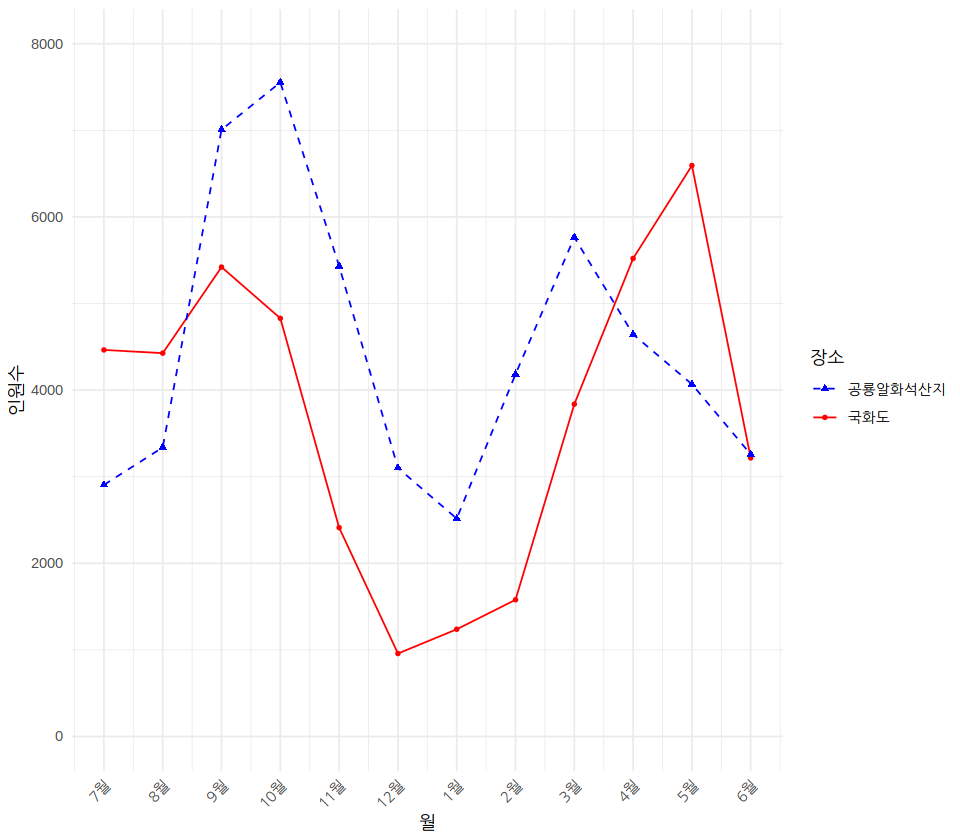

In [217]:
# 18 번

# 그래프 작성
library(ggplot2)

par(mar = c(10, 10, 10, 10)) # 마진 설정

p <- ggplot(data, aes(x = 번호)) +
  geom_point(aes(y = 국화도, color = "국화도"), shape = 20) +
  geom_line(aes(y = 국화도, color = "국화도"), linetype = 1) +
  geom_point(aes(y = 공룡알화석산지, color = "공룡알화석산지"), shape = 17) +
  geom_line(aes(y = 공룡알화석산지, color = "공룡알화석산지"), linetype = 2) +
  scale_color_manual(
    values = c(국화도 = "red", 공룡알화석산지 = "blue"),
    labels = c(국화도 = "국화도", 공룡알화석산지 = "공룡알화석산지")
  ) +
  ylim(0, 8000) +
  scale_x_continuous(
    breaks = c(1:12),
    labels = paste0(c(7:12, 1:6), "월")
  ) +
  labs(x = "월", y = "인원수", color = "장소") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

p

In [218]:
# 19번
data <- read.csv("서울시지하철승하차_2024년_10월.csv")
head(data)

,날짜,호선,역이름,승차인원,하차인원
,<int>,<chr>,<chr>,<dbl>,<dbl>
1,20241001,1호선,서울역,38900,36778
2,20241001,1호선,시청,27218,31185
3,20241001,1호선,종각,29403,23654
4,20241001,1호선,종로3가,27365,23047
5,20241001,1호선,종로5가,23620,22301
6,20241001,1호선,동대문,11881,12169


In [219]:
# 20번
filtered_data <- subset(data, 역이름 == "고속터미널")
filtered_data$일 <- as.numeric(substr(filtered_data$날짜, 7, 8))
ex <- filtered_data
head(ex)


,날짜,호선,역이름,승차인원,하차인원,일
,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
81,20241001,3호선,고속터미널,45486,43360,1
241,20241001,7호선,고속터미널,13980,11597,1
299,20241001,9호선,고속터미널,13222,18614,1
700,20241002,3호선,고속터미널,50043,48732,2
860,20241002,7호선,고속터미널,18792,15739,2
918,20241002,9호선,고속터미널,16905,22386,2


In [220]:
# 21번
library(dplyr)

result <- ex %>%
  group_by(호선) %>%
  summarise(
    n = n(),                                # 관측 수
    승차인원_최소 = min(승차인원),
    하차인원_최소 = min(하차인원),
    승차인원_평균 = mean(승차인원),
    하차인원_평균 = mean(하차인원)
  )

result

호선,n,승차인원_최소,하차인원_최소,승차인원_평균,하차인원_평균
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
3호선,31,38659,37046,50405.03,47900.65
7호선,31,11429,9378,17767.87,14294.03
9호선,31,13222,18614,16313.48,22245.45


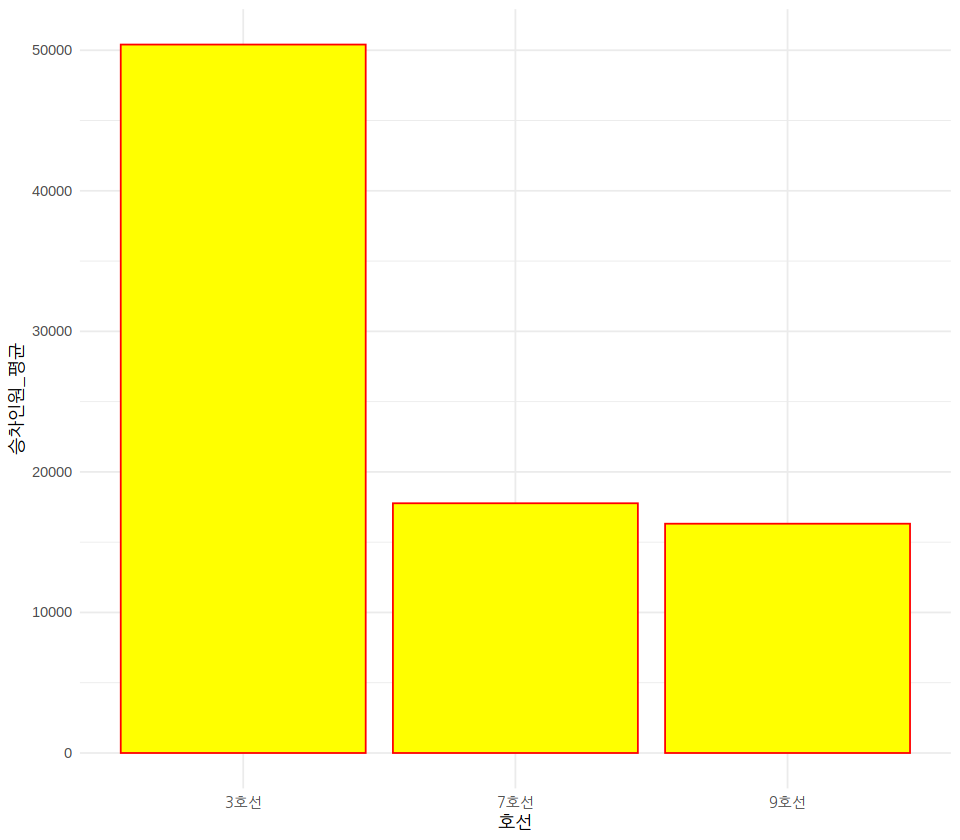

In [221]:
# 22번
library(ggplot2)


ggplot(result, aes(x = 호선, y = 승차인원_평균)) +
  geom_bar(stat = "identity", fill = "yellow", color = "red") +  # 막대 내부 노랑, 테두리 빨강
  
  theme_minimal()


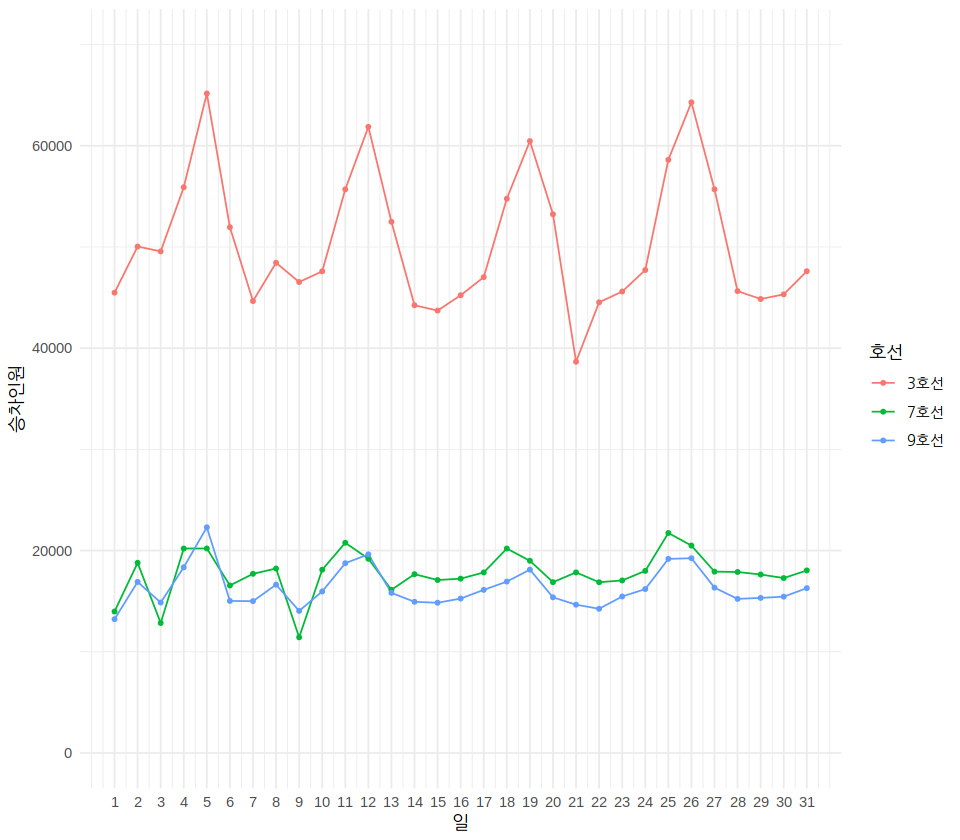

In [222]:
# 23번
library(ggplot2)

# 시계열 그래프 생성
ggplot(ex, aes(x = 일, y = 승차인원, color = 호선, group = 호선)) +
  geom_line(size = 0.5) +
  geom_point(size = 1) +
  scale_x_continuous(breaks = 1:31) +  # x축 눈금을 1부터 31까지
  scale_y_continuous(limits = c(0, 70000)) +  # y축 범위를 0부터 70000으로 제한
 
  theme_minimal()


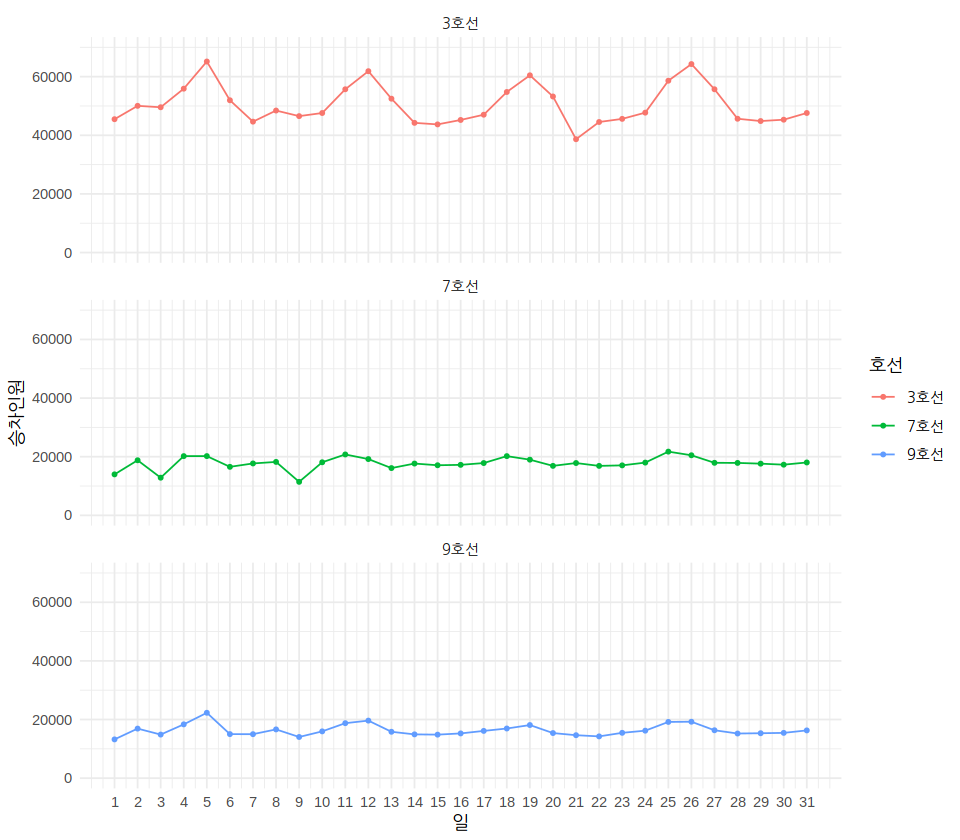

In [223]:
# 24번
library(ggplot2)

# 그래프를 3개로 나누기 위해 facet_wrap 사용
ggplot(ex, aes(x = 일, y = 승차인원, group = 1)) +
  geom_line(size = 0.5, aes(color = 호선)) +
  geom_point(size = 1, aes(color=호선)) +
  facet_wrap(~호선, ncol = 1) +  # 각 호선별로 그래프 분리
  scale_x_continuous(breaks = 1:31) +
  scale_y_continuous(limits = c(0, 70000)) +
  
  theme_minimal()


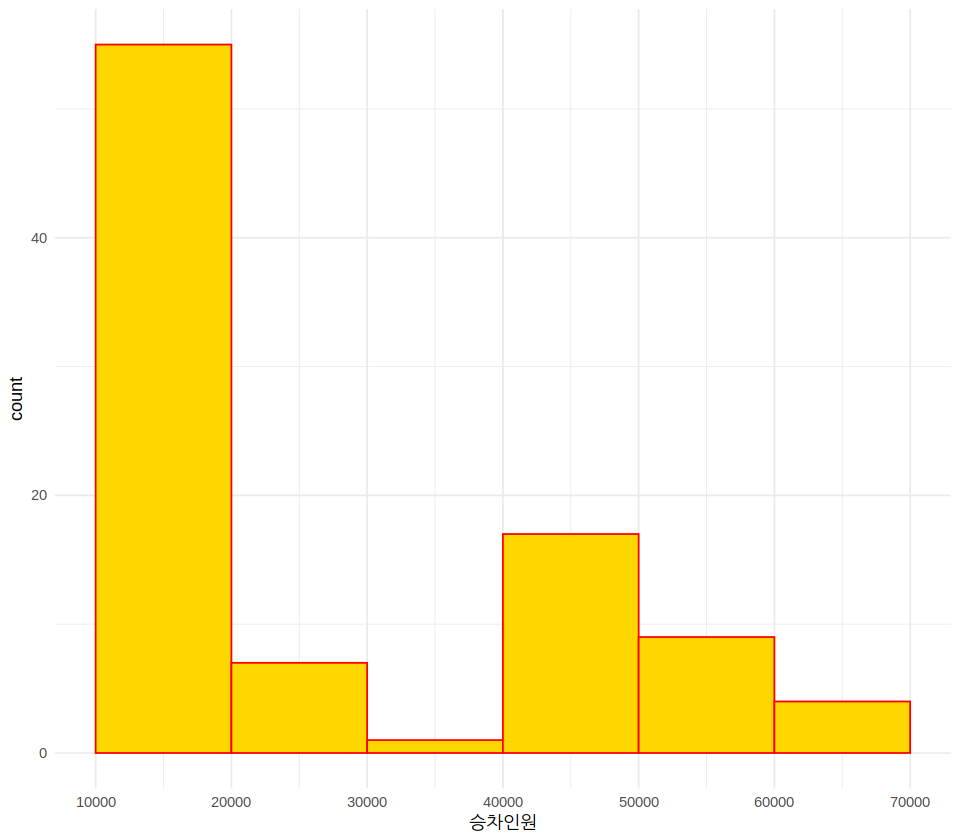

In [224]:
# 25번
library(ggplot2)

# 히스토그램 생성
ggplot(ex, aes(x = 승차인원)) +
  geom_histogram(
    binwidth = 10000,               # 계급의 크기를 10000으로 설정
    fill = "gold",                  # 직사각형 내부 색상
    color = "red",                  # 직사각형 테두리 색상
    boundary = 0                    # 구간 경계
  ) +
  scale_x_continuous(
    limits = c(10000, 70000),       # x축 범위를 10000 ~ 70000으로 제한
    breaks = seq(10000, 70000, 10000) # x축 눈금을 10000 간격으로 설정
  ) +
  
  theme_minimal() 

In [225]:
# 26번

result <- table(cut(ex$승차인원, breaks = seq(10000, 70000, by = 10000), include.lowest = TRUE))
mid_values <- (seq(10000, 70000, by = 10000)[-1] + seq(10000, 70000, by = 10000)[-length(seq(10000, 70000, by = 10000))]) / 2
y_values <- c(0, as.vector(result), 0)

mid_df <- data.frame(x = c(5000, mid_values, 75000), y = y_values)
mid_df

x,y
<dbl>,<dbl>
5000,0
15000,55
25000,7
35000,1
45000,17
55000,9
65000,4
75000,0


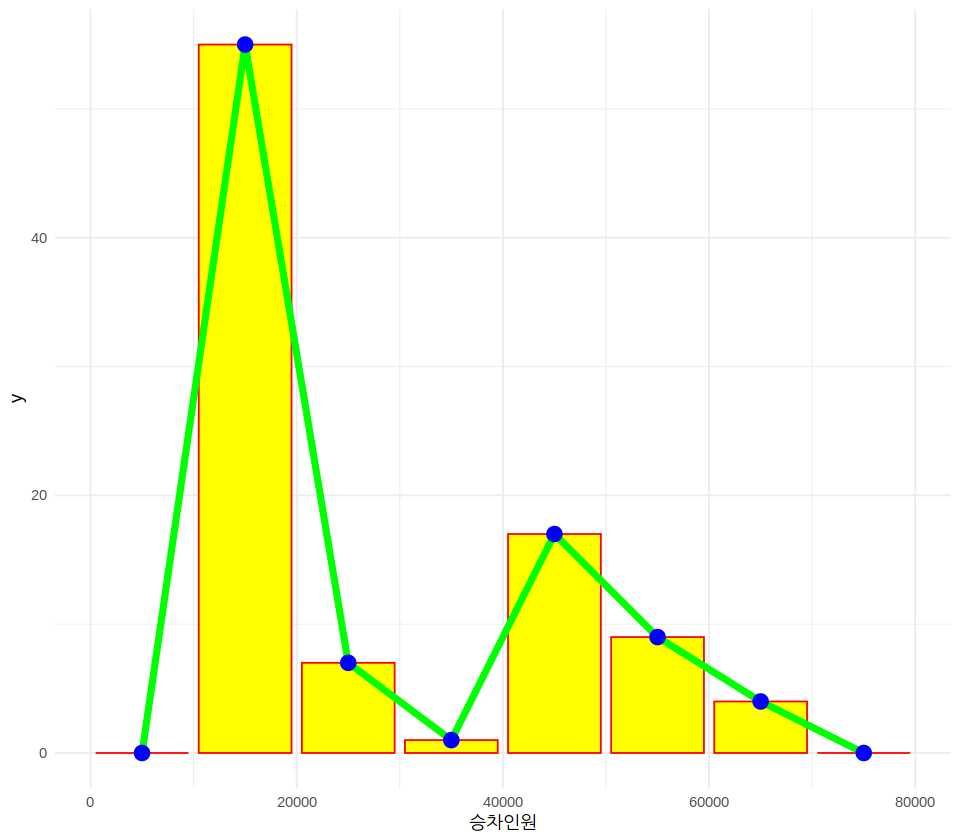

In [226]:
# 27번
library(ggplot2)

ggplot() +
  geom_bar(data = mid_df, aes(x = x, y = y), stat = "identity", fill = "yellow", color = "red") +
  geom_line(data = mid_df, aes(x = x, y = y), color = "green", size = 2) +
  geom_point(data = mid_df, aes(x = x, y = y), color = "blue", size = 4) +
  labs(
       x = "승차인원", y = "y") +
  theme_minimal()
